# 分类树

## 红酒数据集

In [0]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [0]:
wine = load_wine()
wine
# 字典的形式

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [0]:
wine.data.shape

(178, 13)

In [0]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [0]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [0]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## 分类树

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [0]:
Xtrain.shape

(124, 13)

In [0]:
Xtest.shape

(54, 13)

In [0]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9074074074074074

## 画树

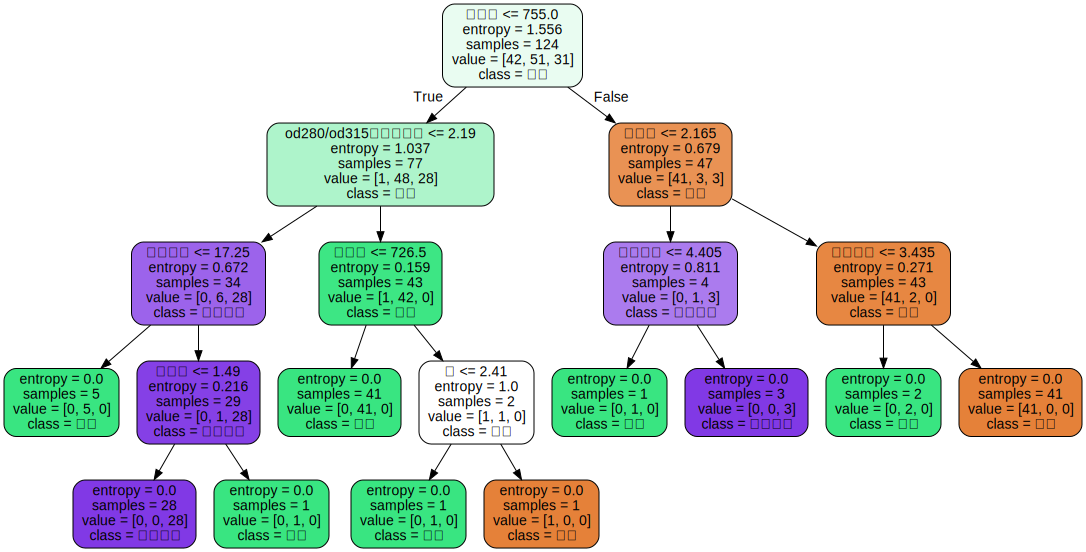

In [0]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True #填充颜色
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [0]:
#特征重要性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.010364346545510945),
 ('灰的碱性', 0.0859334543136864),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.12052136391871153),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.07729141352958586),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.25987743544234265),
 ('脯氨酸', 0.4460119862501626)]

## random_state

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现

In [0]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9259259259259259

In [0]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=2 #固定每次运算的结果
                                  ,splitter="random"
                                  )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score



0.9259259259259259

splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会
优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在
分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这
也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能
性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合

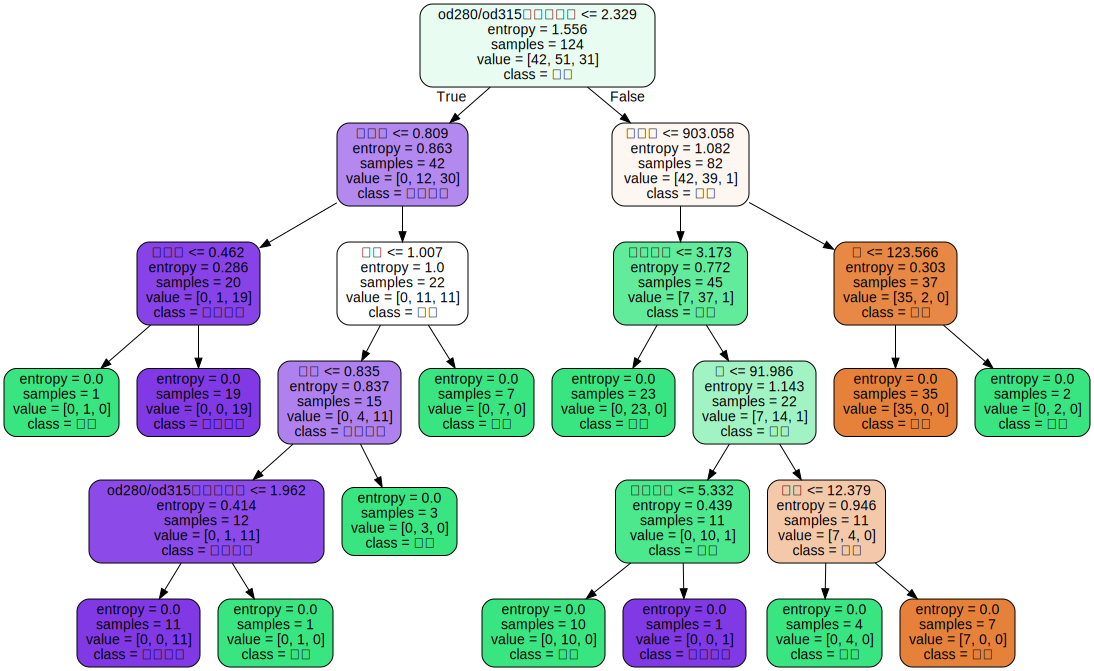

In [0]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [0]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

## 剪枝

### max_depth
限制树的最大深度，超过设定深度的树枝全部剪掉
这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所
以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效
果再决定是否增加设定深度

### min_samples_leaf
限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分
枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生

### min_samples_split
限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则
分枝就不会发生

In [0]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                              ,random_state=2
                              ,splitter="random"
                              ,max_depth=3
                              ,min_samples_leaf=10
                              ,min_samples_split=10
                              )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score


0.8703703703703703

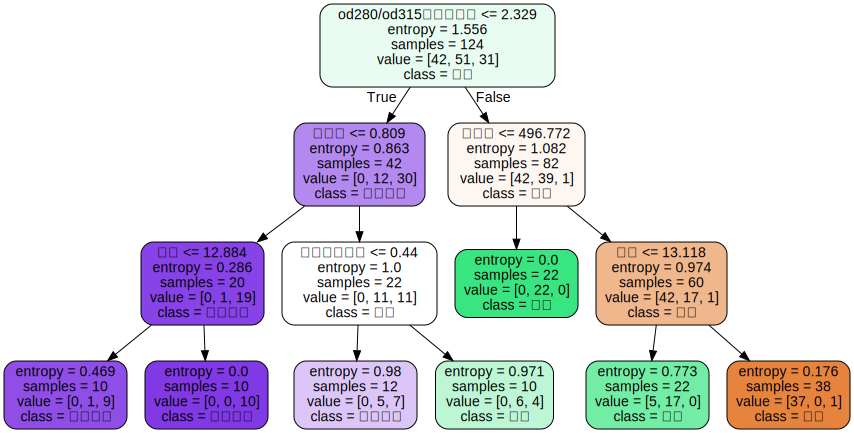

In [0]:
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [0]:
clf.score(Xtrain,Ytrain)


0.8709677419354839

In [0]:
clf.score(Xtest,Ytest)

0.8703703703703703

## 确认最优的剪枝参数

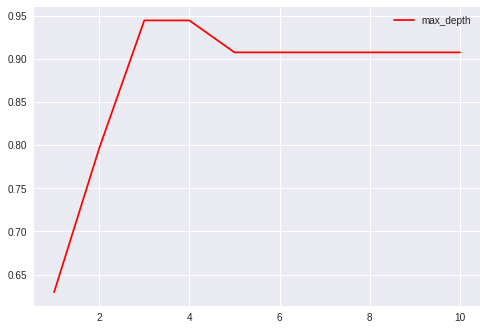

In [0]:
import matplotlib.pyplot as plt
import numpy as np
test = []
for i in range(10):
  clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
  clf = clf.fit(Xtrain, Ytrain)
  score = clf.score(Xtest, Ytest)
  test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [0]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
test

[0.6296296296296297,
 0.7962962962962963,
 0.9444444444444444,
 0.9444444444444444,
 0.9074074074074074,
 0.9074074074074074,
 0.9074074074074074,
 0.9074074074074074,
 0.9074074074074074,
 0.9074074074074074]

## 重要属性和接口

In [0]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 4, 19,  4, 11,  7, 13, 19, 13,  6, 11, 19,  4, 11,  8, 19, 19,  4,
        4, 20, 13, 10,  4, 13, 19, 19, 19, 15, 13, 11, 19, 13,  4, 19,  4,
       13, 13, 15,  7, 19, 19,  4, 19,  4, 19,  4, 19,  4, 19, 13, 19, 13,
       13,  8,  4])

In [0]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 1, 1, 2])

# 回归树

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [0]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring = "neg_mean_squared_error")
# 评估指标为负的MSE

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

## 实例：一维回归的图像绘制

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [0]:
rng = np.random.RandomState(1)
# 固定随机性


In [0]:
rng.rand(10,1)

array([[0.41919451],
       [0.6852195 ],
       [0.20445225],
       [0.87811744],
       [0.02738759],
       [0.67046751],
       [0.4173048 ],
       [0.55868983],
       [0.14038694],
       [0.19810149]])

In [0]:
X = np.sort(5 * rng.rand(80,1), axis=0)


In [0]:
np.sin(X).shape

(80, 1)

In [0]:
y = np.sin(X).ravel()
# ravel 进行降维
y.shape


(80,)

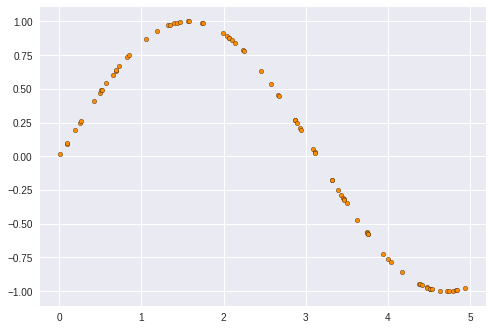

In [0]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [0]:
y[::5] += 3 * (0.5 - rng.rand(16))
#np.random.rand(数组结构)，生成随机数组的函数
#添加噪声


In [0]:
#了解降维函数ravel()的用法
np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

(2,)

In [0]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
np.arange(0.0, 5.0, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [0]:
np.arange(0.0, 5.0, 0.01).shape

(500,)

In [0]:
np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# 增维

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [0]:
np.arange(0.0, 5.0, 0.01)[:, np.newaxis].shape

(500, 1)

In [0]:
np.arange(0.0, 5.0, 0.01)[np.newaxis,:].shape

(1, 500)

In [0]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

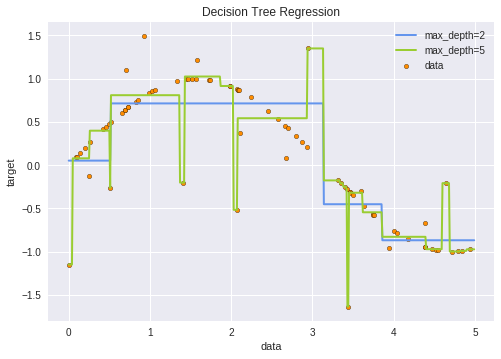

In [0]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 实例：泰坦尼克号幸存者的预测

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv(r"./train.csv")


In [0]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)


In [0]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()
# 默认axis =0 删除含有缺失值的行


## 数据转换成数值型变量

In [0]:
#将分类变量转换为数值型变量
#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

In [0]:
#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()

In [0]:
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
                                          

In [0]:
#查看处理后的数据集
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [0]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
#查看分好的训练集和测试集
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,804,3,1,0.42,0,1,8.5167,1
1,24,1,1,28.00,0,0,35.5000,0
2,643,3,0,2.00,3,2,27.9000,0
3,772,3,1,48.00,0,0,7.8542,0
4,483,3,1,50.00,0,0,8.0500,0


In [0]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_



0.7715355805243446

In [0]:
score = cross_val_score(clf,X,y,cv=10).mean()
score


0.7469611848825333

0.8166624106230849


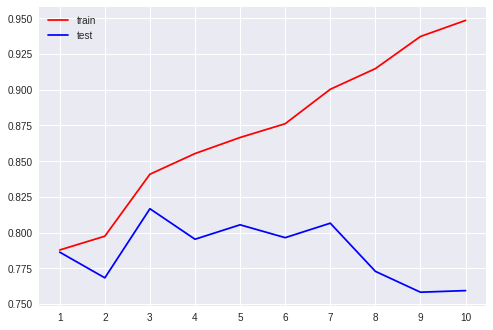

In [0]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。

## 用网格搜索调整参数

In [0]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
              }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46], 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.131...0526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
GS.best_params_
#返回最佳组合

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [0]:
GS.best_score_

0.8311897106109325

# I 实例：分类树在合成数集上的表现

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

In [0]:
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                            n_features=2, #包含2个特征，即生成二维数据
                            n_redundant=0, #添加冗余特征0个
                            n_informative=2, #包含信息的特征是2个
                            random_state=1, #随机模式1
                            n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                            )                         

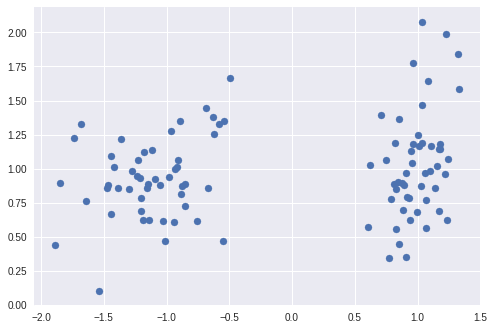

In [0]:
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
plt.scatter(X[:,0],X[:,1])

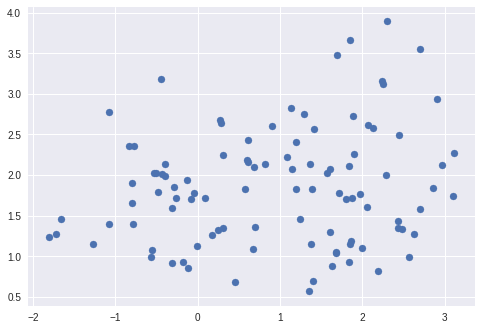

In [0]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成
# 随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会继续下降
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0],X[:,1])

In [0]:
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


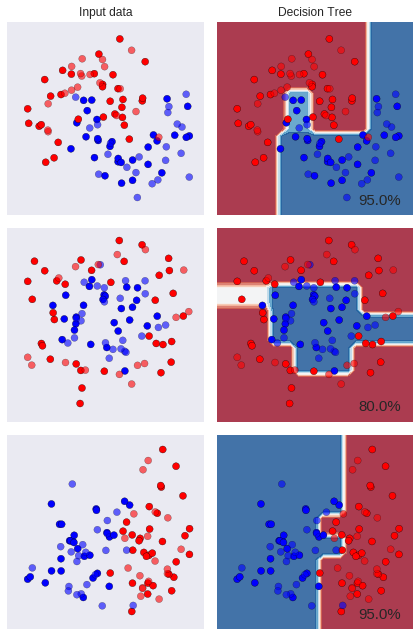

In [0]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
    random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以
    #   narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
    np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
              cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
              cmap=cm_bright, alpha=0.6,edgecolors='k')
    #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
    #############################从这里开始是决策树模型##########################
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
    #在这里，len(datasets)其实就是3，2是两列
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
    #ravel()能够将一个多维数组转换成一维数组
    #np.c_是能够将两个数组组合起来的函数

    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策
    #   树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，切出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
             edgecolors='k')
    # 将测试集放到图中去
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
              edgecolors='k', alpha=0.6)
    #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
    size=15, horizontalalignment='right')
    #让i继续加一
    i += 1
plt.tight_layout()
plt.show()